# Feature Engineering
# Klassifikation
# Regression
## Einleitung
## Klassische Methoden 

In [2]:
## prepare env and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data, prep_demo_data
X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', 'Price', seed = 1234)
X_demo, y_demo = prep_demo_data('demo_data_regr.csv', 'y')

### LinearRegression (OLS)
#### Theorie

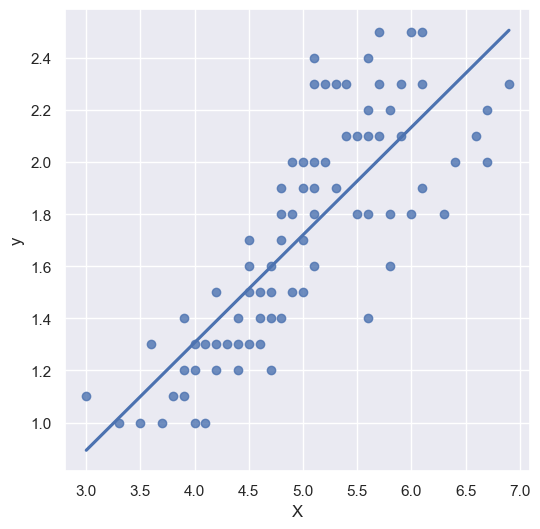

In [4]:
## regression line on the base of demo data
plt.figure(figsize=(6,6))
ax = sns.regplot(x=X_demo, y=y_demo, ci=None)
ax.set(xlabel='X', ylabel='y');

In [5]:
## information about trained model

## train
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_demo, y_demo)
print(model.get_params())

## model attributes
#print(model)
print('model.intercept_ :', model.intercept_)
print('model.coef_ :', model.coef_)

## score
print('model.score :', model.score(X_demo, y_demo))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
model.intercept_ : -0.34791755729146434
model.coef_ : [0.41378104]
model.score : 0.6460242903212707


0.6460242903212707


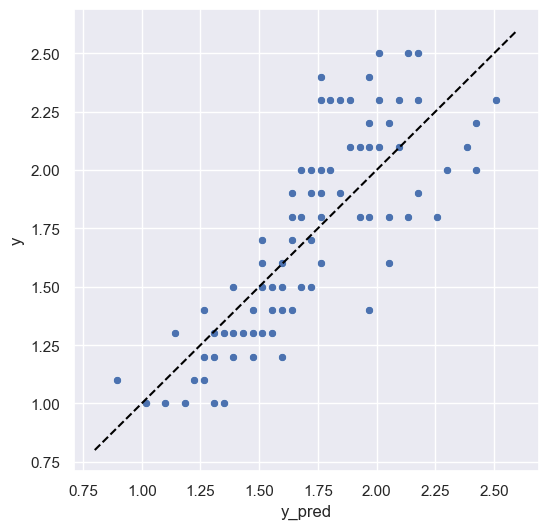

In [6]:
## qualitative and quantitative diagnostics
## make predictions
y_pred = model.predict(X_demo)

## calc r2_score with skearn.metrics.r2_score
from sklearn.metrics import r2_score
print(r2_score(y_demo, y_pred))

## visualize
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=y_pred, y=y_demo)
ax.set(xlabel='y_pred', ylabel='y')
ls = np.linspace(0.8, 2.6, 100)
plt.plot(ls, ls, color='black', linestyle='dashed');

#### Exkurs: Lineare Regression mit Matrix-Operationen

see `extra_3.2.1.2_linear_regression_with_matrix_operations.ipynb`

#### Praxis

In [10]:
## load classes and define model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [11]:
## attributes
print(model.intercept_)
print(model.coef_)
print(X_train.columns) ## no model attribute

-105513873.23403685
[ 2.45383606e+05 -1.41356398e+05 -4.03836664e+04  1.61336039e+05
  4.03911483e+04  8.33032709e+04  2.73783998e+05 -2.48422914e+03
 -4.97722450e+03 -5.15021962e+05  1.92635869e+05 -1.19821800e+00
  9.42690151e+04  4.16608193e+04  5.41816991e+04 -1.85021045e+05
  8.79055470e+04  2.43998169e+05  2.65590236e+05 -2.31675039e+05
  1.75618897e+03  3.11569156e+04  4.70830468e+03]
Index(['Rooms', 'Type', 'Distance', 'Bathroom', 'Car', 'logLandsize',
       'logBuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Propertycount', 'Method_S', 'Method_SP', 'Method_VB',
       'Regionname_Northern_Metropolitan',
       'Regionname_South_Eastern_Metropolitan',
       'Regionname_Southern_Metropolitan', 'Regionname_Victoria',
       'Regionname_Western_Metropolitan', 'month', 'year', 'day_of_week'],
      dtype='object')


In [12]:
## methode: Model score
print(model.score(X_test, y_test))

0.5601419746121152


In [13]:
## control with predict and explicit use of r2_score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.5601419746121152


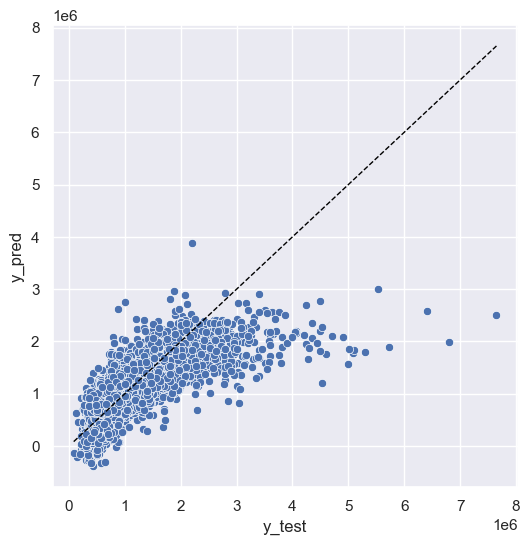

In [14]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(xlabel='y_test', ylabel='y_pred')
#ls = np.linspace(0, 8000000, 100)
ls = np.linspace(min(y_test), max(y_test), 100)

plt.plot(ls, ls, color='black', linewidth=1, linestyle='dashed');

#### Exkurs: Lineare Regression in der Datenanalyse

see `extra_3.2.1.4_linear_regression_in_data_analytics.ipynb`

### Regularisiert (Lasso & Ridge)
#### Theorie

kein Code

#### Praxis

Lasso

In [21]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))

-105470886.17680836
[ 2.45382007e+05 -1.41353663e+05 -4.03813210e+04  1.61339539e+05
  4.03901128e+04  8.33016390e+04  2.73752966e+05 -2.48435395e+03
 -4.97724694e+03 -5.14822258e+05  1.92458888e+05 -1.19820804e+00
  9.42421791e+04  4.16277687e+04  5.41476009e+04 -1.85046554e+05
  8.78859504e+04  2.43991164e+05  2.65409309e+05 -2.31713779e+05
  1.75566829e+03  3.11522359e+04  4.70809165e+03]
0.5601427046293165


Ridge

In [23]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))

-104848432.75507246
[ 2.45313734e+05 -1.41286745e+05 -4.03551367e+04  1.61451266e+05
  4.03883258e+04  8.32645429e+04  2.73073082e+05 -2.48815619e+03
 -4.97090955e+03 -5.01905886e+05  1.91808304e+05 -1.19046859e+00
  9.41302477e+04  4.15608389e+04  5.40286449e+04 -1.85615436e+05
  8.95306012e+04  2.44605950e+05  2.62482445e+05 -2.31923181e+05
  1.75409669e+03  3.11367809e+04  4.71584524e+03]
0.5601387631837784


In [24]:
## use Lasso for feature selection
model = Lasso(alpha=10000)
model.fit(X_train, y_train)
results = pd.DataFrame({
    'cols' : X_train.columns,
    'coefs' : model.coef_})
print(results.loc[results['coefs'] > 0])

## create a filter maks of the above
mask = results.loc[results['coefs'] > 0]['cols'].tolist()
print(mask)

                                cols          coefs
0                              Rooms  253568.228957
3                           Bathroom  168521.486901
4                                Car   34293.196859
5                        logLandsize   76942.997592
12                          Method_S   18550.768445
17  Regionname_Southern_Metropolitan  286752.054486
22                       day_of_week     781.020849
['Rooms', 'Bathroom', 'Car', 'logLandsize', 'Method_S', 'Regionname_Southern_Metropolitan', 'day_of_week']


### Logistische Regression
(hier nur noch der Vollständigkeit halber, wurde unter Klassifikation behandelt)